<h1> Practica de K-NN <h1/>
Predice el valor de un punto desconocido. Según los vecinos más cercanos.


In [57]:
import numpy as np
import matplotlib.pyplot as plt
import statistics as st
import random
import scipy.stats as ss
import sklearn as sk

#K-NN

In [58]:
def distancia(p1, p2):
	"""
	Give the distance between two points.
	"""
	distancia=np.sqrt(np.sum(np.power(p2-p1,2)))
	return distancia

def find_nearest_neighbors(p, points, k=5):
  """
  Return de cordenates of nearest points
  """
  distances= np.zeros(points.shape[0])
  for i in range(len(distances)):
    distances[i]=distancia(p, points[i])
  ind=np.argsort(distances)
  return ind[:k]

def majority_votes(votes):
	"""
	Return the most commun item in votes.
	"""
	votes_counteds={}
	for vote in votes:
		if vote in votes_counteds:
			votes_counteds[vote] += 1
		else:
			votes_counteds[vote] = 1
	winners=[]
	max_count=max(votes_counteds.values())
	for vote in votes_counteds:
		if votes_counteds[vote]==max_count:
			winners.append(vote)
	return random.choice(winners)
 
def KNN_predict(p, points, outcomes, k=5):
  """
  Return of prediction of the point
  """
  ind=find_nearest_neighbors(p, points, k)
  return majority_votes(outcomes[ind])


>Points= son las coordenadas de los puntos que serviran de referencia, son rojos y verdes.

>P= es la coordenada del punto a predecir.


In [ ]:
points= np.array([[1,1], [1,2], [1,3],[2,1], [2,2],[2,3],[3,1],[3,2],[3,3]])
p= np.array([1.7, 2.5])
np.argsort(,)

array([[0, 1],
       [0, 1],
       [0, 1],
       [1, 0],
       [0, 1],
       [0, 1],
       [1, 0],
       [1, 0],
       [0, 1]])

Grafica

(0.5, 3.5, 0.5, 3.5)

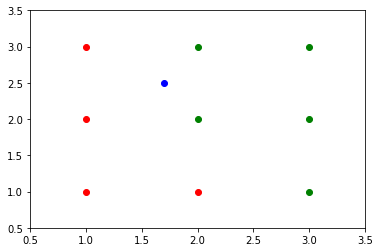

In [ ]:
plt.plot(points[:4,0], points[:4,1], "ro")
plt.plot(points[4:,0], points[4:,1], "go")
plt.plot(p[0], p[1], "bo")
plt.axis([0.5,3.5,0.5,3.5])

Prueba

El valor del punto será igual a su valor más cercano que más se repita.

In [ ]:
ind=find_nearest_neighbors(p, points); points[ind]
outcomes= np.array(["Rojo","Rojo","Rojo","Rojo","Verde","Verde","Verde","Verde","Verde"])
point_is=KNN_predict(p, points, outcomes, 1)
point_is

'Verde'

#Synthetic data

In [59]:
def generate_a_synth_data(n=50):
  points= np.concatenate((ss.norm(0,1).rvs((n,2)),ss.norm(1,1).rvs((n,2))),axis=0)
  outcomes= np.concatenate((np.repeat(0,n), np.repeat(1,n)))
  return (points, outcomes)

#Prediction Grid

In [60]:
def make_prediction_grid(predictors, outcomes, limits, h, k=50):
  (x_min, x_max, y_min, y_max) = limits
  xs=np.arange(x_min, x_max, h)
  ys=np.arange(y_min, y_max, h)
  xx, yy = np.meshgrid(xs, ys)
  
  prediction_grid=np.zeros(xx.shape, dtype=int)
  for i,x in enumerate(xs):
    for j, y in enumerate(ys):
      p=np.array([x,y])
      prediction_grid[j,i]= KNN_predict(p, predictors, outcomes, k)
  return (xx, yy, prediction_grid)

#Plot prediction grid

In [61]:
def plot_prediction_grid (xx, yy, prediction_grid, filename="prediction_grid.pdf"):
    """ Plot KNN predictions for every point on the grid."""
    from matplotlib.colors import ListedColormap
    background_colormap = ListedColormap (["hotpink","lightskyblue", "yellowgreen"])
    observation_colormap = ListedColormap (["red","blue","green"])
    plt.figure(figsize =(10,10))
    plt.pcolormesh(xx, yy, prediction_grid, cmap = background_colormap, alpha = 0.5)
    plt.scatter(predictors[:,0], predictors [:,1], c = outcomes, cmap = observation_colormap, s = 50)
    plt.xlabel('Variable 1'); plt.ylabel('Variable 2')
    plt.xticks(()); plt.yticks(())
    plt.xlim (np.min(xx), np.max(xx))
    plt.ylim (np.min(yy), np.max(yy))
    plt.savefig(filename)
    #return plt.show()

#Prueba

Generar datos sinteticos

In [ ]:
predictors, outcomes = generate_a_synth_data()
predictors.shape, outcomes.shape

((100, 2), (100,))

In [ ]:
limits=(-5, 5, -5, 5)
k=50
h=0.5
xx, yy, prediction_grid=make_prediction_grid(predictors, outcomes, limits, h, k)
#print(f"xx= {xx}, yy= {yy}, prediction_grid= {prediction_grid}")

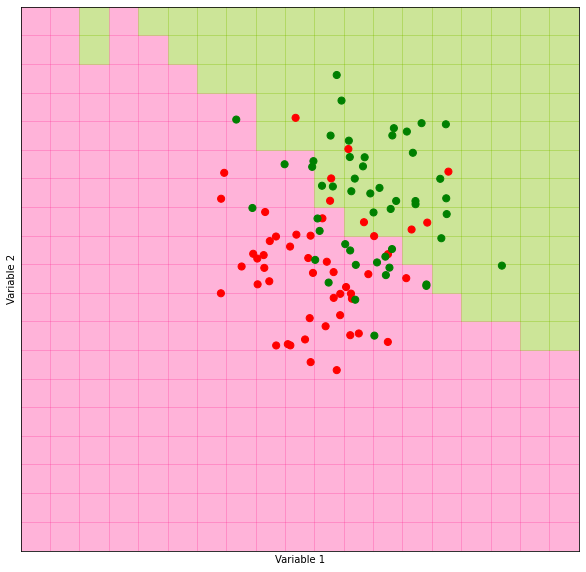

In [ ]:
plot_prediction_grid(xx, yy, prediction_grid)

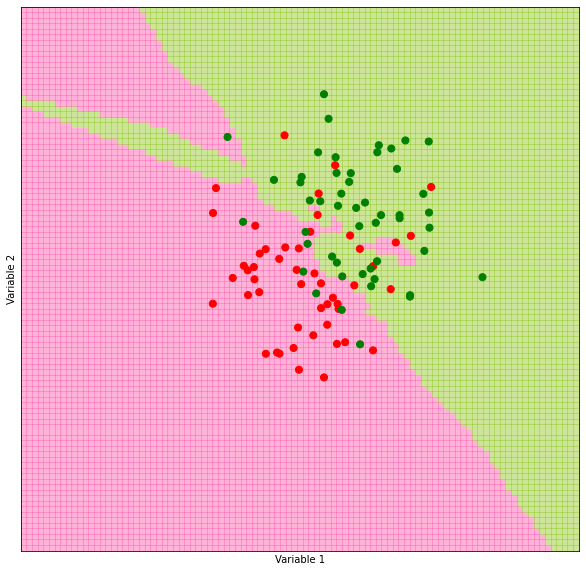

In [ ]:
x, y, p =make_prediction_grid(predictors, outcomes, limits, h, 5)
plot_prediction_grid(x, y, p)

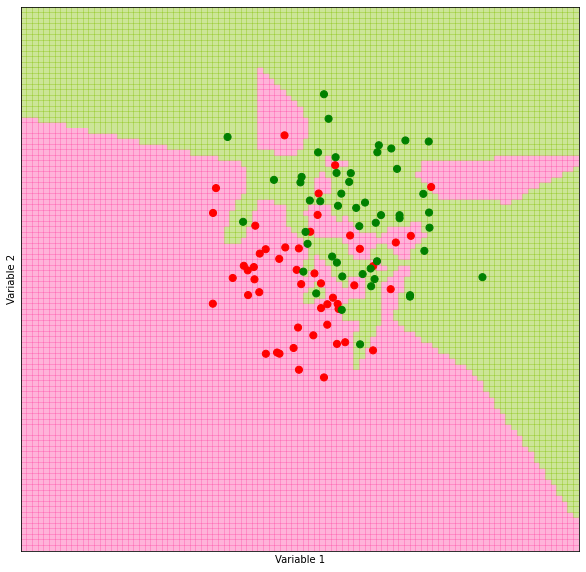

In [ ]:
x, y, p =make_prediction_grid(predictors, outcomes, limits, h, 1)
plot_prediction_grid(x, y, p)

#notas:

A phenomenon that is known as the bias-variance tradeoff:

It turns out that using a value for k that's too large or too small is not optimal.

#Knn with Scikit learn an iris data

In [83]:
from sklearn import datasets
from sklearn.neighbors import KNeighborsClassifier as KNN

>*Class*: 'setosa', 'versicolor', 'virginica'

>*Data*: 'sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)'

In [77]:
iris= datasets.load_iris()
tutor=iris.data[:,:2]#toma las columnas 0 y 1
predictors=iris.data[:,2:4]#toma las columnas 2 y 3
predictors.shape==tutor.shape

True

##Prueba 1

(Text(0.5, 0, 'sepal length (cm)'), Text(0, 0.5, 'sepal width (cm)'))

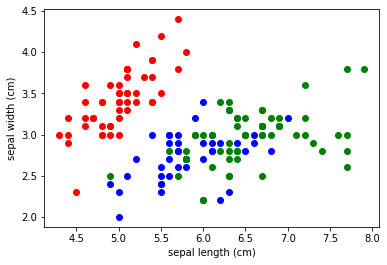

In [78]:
plt.plot(tutor[outcomes==0][:,0],tutor[outcomes==0][:,1], "ro")
plt.plot(tutor[outcomes==1][:,0],tutor[outcomes==1][:,1], "bo")
plt.plot(tutor[outcomes==2][:,0],tutor[outcomes==2][:,1], "go")
plt.xlabel('sepal length (cm)'),plt.ylabel('sepal width (cm)')

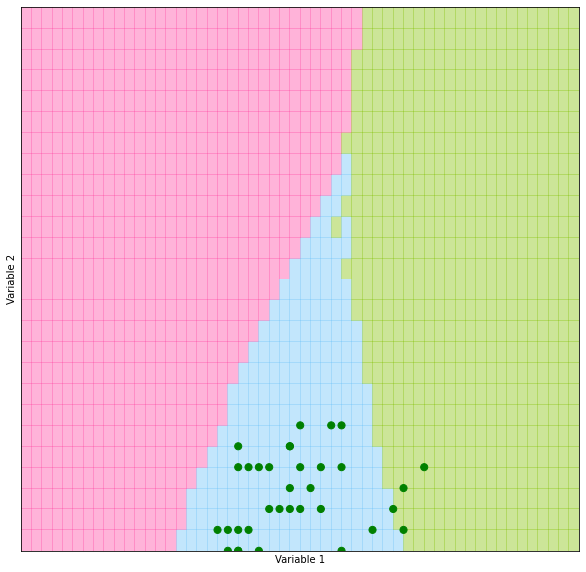

In [79]:
limites=(3,8.5,1.9,4.6)
h=0.1
xx, yy, p = make_prediction_grid(tutor,outcomes,limites,h,)
plot_prediction_grid(xx,yy,p)

##Prueba 2
> Presenta un fallo al querer graficar una segunda tabla con otros datos.

(Text(0.5, 0, 'petal length (cm)'), Text(0, 0.5, 'petal width (cm)'))

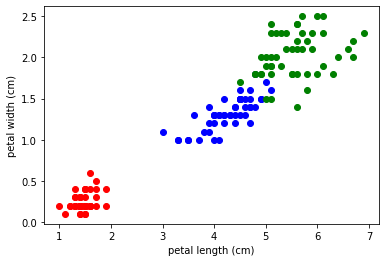

In [80]:
plt.plot(predictors[outcomes==0][:,0],predictors[outcomes==0][:,1], "ro")
plt.plot(predictors[outcomes==1][:,0],predictors[outcomes==1][:,1], "bo")
plt.plot(predictors[outcomes==2][:,0],predictors[outcomes==2][:,1], "go")
plt.xlabel(iris.feature_names[2]),plt.ylabel(iris.feature_names[3])

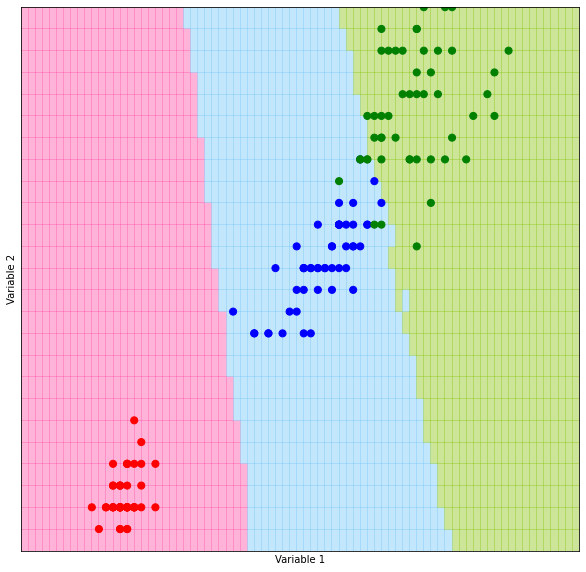

In [81]:
limites=(0,8,0,2.6)
h=0.1
xx, yy, a = make_prediction_grid(predictors,outcomes,limites,h)
plt.new_figure_manager(0)
plot_prediction_grid(xx,yy,a)

##Prueba 3 con Scikitlearn KNN

In [105]:
kneb=KNN(n_neighbors= 5)
kneb.fit(predictors,outcomes)
#skn_pre=kneb.predict(np.array[[4,5]])
#predictors

KNeighborsClassifier()

In [98]:
my_pre= np.array([KNN_predict(p,predictors,outcomes,5) for p in predictors])
100*np.mean(my_pre==skn_pre), 100*np.mean(my_pre==outcomes), 100*np.mean(my_pre==skn_pre)

(100.0, 96.0, 100.0)